In [17]:
# from coffea.nanoevents import TreeMakerSchema, BaseSchema, NanoEventsFactory
from fit_functions import fit_unbinned_double_gauss_J, fit_unbinned_gauss_J_with_background
import matplotlib.pyplot as plt
import uproot as up
import numpy as np
import pandas as pd
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT

In [18]:
# dataset = '../outputs/2022MC_ZmmJpsimm_AllCandidates.root'
dataset = 'temp.root'
file = up.open(dataset)

In [19]:
events = file['ntuple;1']
columns = ['Event', 'B_Ups1_mass', 'B_Ups2_mass', 'FourL_mass', 'FourL_VtxProb']
branches = events.arrays(columns)

In [20]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['FourL_mass'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [21]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 2842
Number of events Preselection: 1


In [22]:
# convert to pandas dataframe
data_dict = {key: ak.to_list(branches[key][0]) for key in branches.fields}
df_candi = pd.DataFrame(data_dict)

In [23]:
df_candi

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
0,8.0,3.083610,90.825508,125.244286,0.867032
1,14.0,3.107986,83.013947,126.588959,0.707146
2,10.0,3.096832,97.443932,125.498718,0.014322
3,21.0,3.140746,93.646805,126.424576,0.414297
4,24.0,3.113393,90.958168,125.402031,0.983545
...,...,...,...,...,...
2837,8977.0,3.016252,92.637192,126.685646,0.982299
2838,8987.0,3.054071,94.176117,126.091454,0.800414
2839,8979.0,3.086800,92.659119,125.789124,0.860143
2840,8978.0,3.113432,87.455040,122.628853,0.568550


In [24]:
df_candi[df_candi.duplicated(subset='Event', keep=False)].sort_values('Event', ascending=False)

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
427,9440.0,3.149168,86.376038,124.102852,0.269913
428,9440.0,3.149168,100.216293,133.095612,0.087725
2260,6882.0,3.089853,90.502113,122.547188,0.818044
2261,6882.0,3.089853,97.796669,121.122238,0.955939
2262,6882.0,3.089853,97.502258,120.748131,0.543779
1930,5807.0,3.104570,83.674446,121.222961,0.484047
1931,5807.0,3.104570,80.228226,118.895477,0.822360
1822,5402.0,3.159854,91.974602,126.136871,0.455289
1823,5402.0,3.159854,89.582062,125.723625,0.821070
1238,3221.0,3.112403,94.031395,127.202888,0.695781


In [25]:
# for duplicated events, keep the one with the highest FourL_VtxProb
df_events = df_candi.sort_values('FourL_VtxProb', ascending=False).drop_duplicates('Event').sort_index()

In [26]:
df_events

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
0,8.0,3.083610,90.825508,125.244286,0.867032
1,14.0,3.107986,83.013947,126.588959,0.707146
2,10.0,3.096832,97.443932,125.498718,0.014322
3,21.0,3.140746,93.646805,126.424576,0.414297
4,24.0,3.113393,90.958168,125.402031,0.983545
...,...,...,...,...,...
2837,8977.0,3.016252,92.637192,126.685646,0.982299
2838,8987.0,3.054071,94.176117,126.091454,0.800414
2839,8979.0,3.086800,92.659119,125.789124,0.860143
2840,8978.0,3.113432,87.455040,122.628853,0.568550


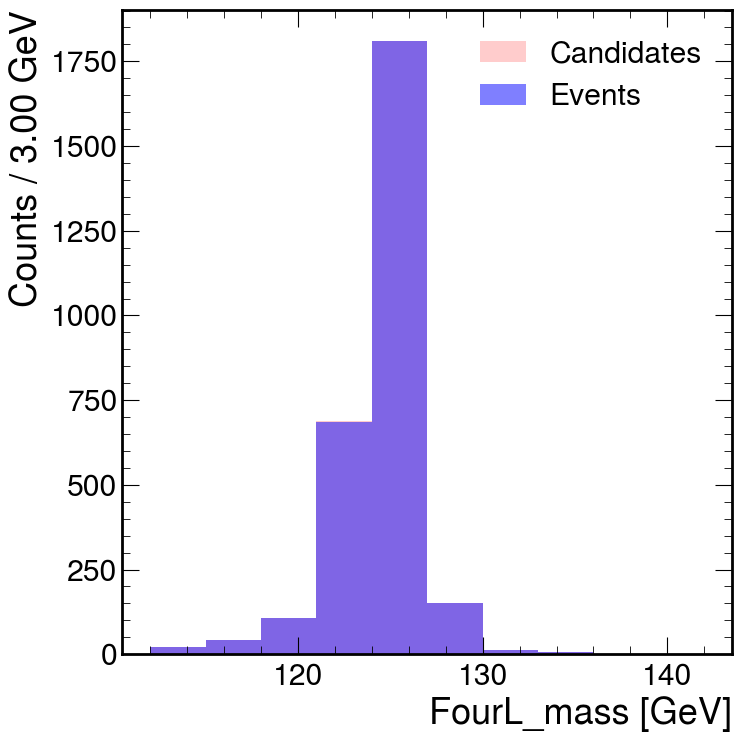

In [27]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 112, 142
# plt.hist(ak.flatten(branches['FourL_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("FourL_mass [GeV]")
plt.legend()
plt.tight_layout()

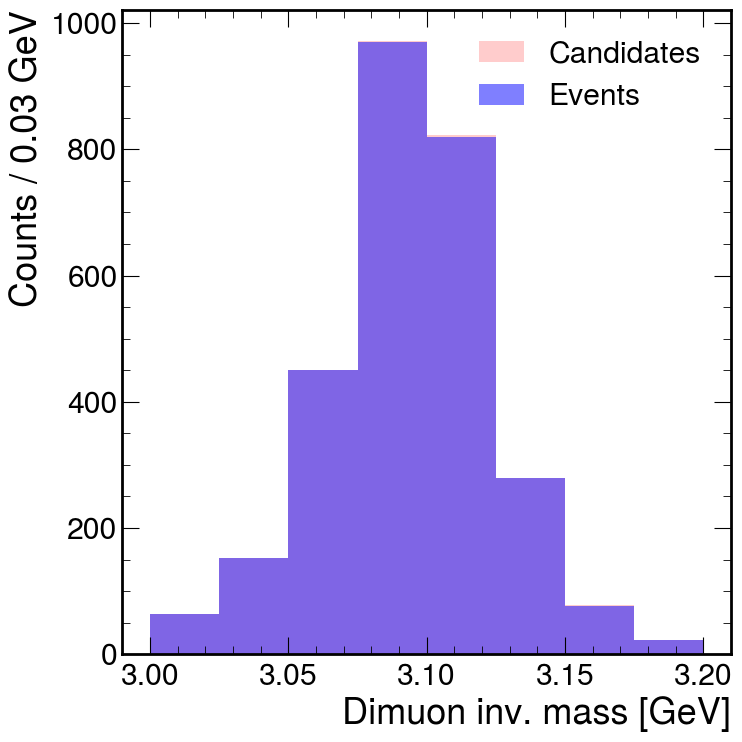

In [28]:
plt.figure(figsize=(8, 8))
# nbins, xlow, xhigh = 7, 9, 9.7
nbins, xlow, xhigh = 8, 3.0, 3.2
# plt.hist(ak.flatten(branches['B_Ups1_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

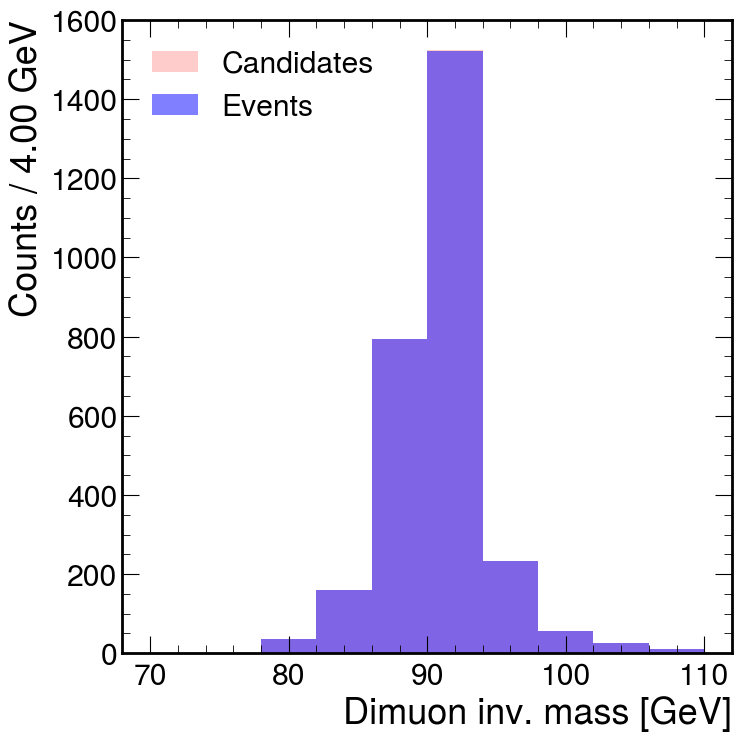

In [29]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 70, 110
# plt.hist(ak.flatten(branches['B_Ups2_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

In [31]:
nbins, xlow, xhigh = 8, 3.0, 3.2
B_J_mass_candidates = df_events['B_Ups1_mass'].to_numpy()
mass = ROOT.RooRealVar("B_J_mass", "DiMuon mass", xlow, xhigh, "GeV")
data = ROOT.RooDataSet.from_numpy({'B_J_mass': B_J_mass_candidates}, [mass])

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (background,gaussian)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           1.00000e-02  2.00000e+00   -1.00000e+01  1.00000e+01
     2 a1           1.00000e-02  2.00000e+00   -1.00000e+01  1.00000e+01
     3 a2           1.00000e-02  2.00000e+00   -1.00000e+01  1.00000e+01
     4 mean         3.10000e+00  2.00000e-02    3.00000e+00  3.20000e+00
     5 nbkg         1.00000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     6 nsig         1.50000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     7 sigma        3.00000e-02  9.00000e-03    1.00000e-02

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


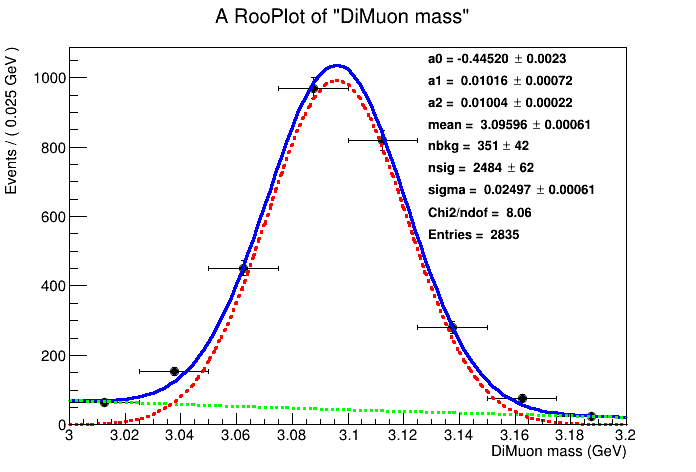

In [32]:
frame = fit_unbinned_gauss_J_with_background(data, mass, nbins)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()